# Image Blending using Gaussian Pyramids

In [1]:
%pylab inline
import cv2;

Populating the interactive namespace from numpy and matplotlib


In [2]:
def imshow2(im_title, im):
    ''' This is function to display the image'''
    plt.figure();
    plt.title(im_title);
    plt.axis("off");
    if len(im.shape) == 2:
        plt.imshow(im, cmap = "gray");
    else:
        im_display = cv2.cvtColor(im, cv2.COLOR_RGB2BGR);
        plt.imshow(im_display);
    plt.show();

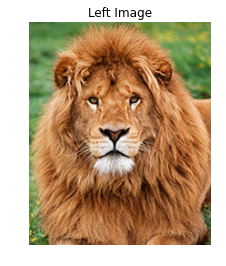

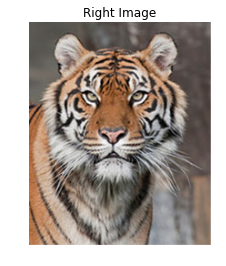

In [3]:
# Load the display the images
im_left = cv2.imread('../data/blending/lion.jpg');
im_right = cv2.imread('../data/blending/tiger.jpg');
imshow2("Left Image", im_left);
imshow2("Right Image", im_right);

In [4]:
# Compute the Gaussian Pyramids
gauss_levels = 7;
gauss_reduce_left = im_left;
gauss_pyr_left = [gauss_reduce_left];
gauss_reduce_right = im_right;
gauss_pyr_right = [gauss_reduce_right];
for i in range(gauss_levels):
    gauss_reduce_left = cv2.pyrDown(gauss_reduce_left);
    gauss_pyr_left.append(gauss_reduce_left);
    gauss_reduce_right = cv2.pyrDown(gauss_reduce_right);
    gauss_pyr_right.append(gauss_reduce_right);

# Prepare the Laplacian Pyramids
lap_pyr_left = []
lap_pyr_right = []
for i in range(1, gauss_levels):
    h, w = gauss_pyr_left[i-1].shape[:2];
    left_append = cv2.subtract(gauss_pyr_left[i-1], cv2.pyrUp(gauss_pyr_left[i], dstsize=(w, h)));
    right_append = cv2.subtract(gauss_pyr_right[i-1], cv2.pyrUp(gauss_pyr_right[i], dstsize=(w, h)));
    lap_pyr_left.append(left_append)
    lap_pyr_right.append(right_append)

'''
# Display the pyramids 
for index, image in enumerate(gauss_pyr_left):
    imshow2("Level {}".format(index), image)
for index, image in enumerate(lap_pyr_left):
    imshow2("Level {}".format(index), image)  
'''
pass

In [5]:
# Combine the images
com_lap = [];
for left, right in zip(lap_pyr_left, lap_pyr_right):
    cols = left.shape[1]
    com_lap.append(np.hstack((left[:, :cols/2], right[:, cols/2:])))

'''
# Display the combined images
# Uncomment to see the Laplacian Pyramid
for index, image in enumerate(com_lap):
    imshow2("Level {}".format(index), image) 
'''
pass

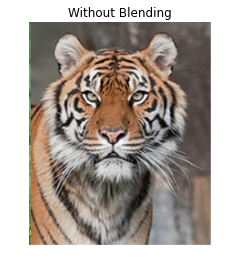

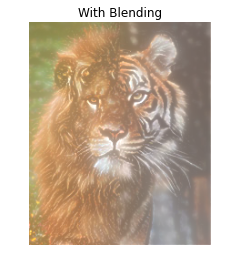

In [6]:
# Now reconstruct
cols = gauss_pyr_left[-2].shape[1]
im_blended = np.hstack((gauss_pyr_left[-2][:, :cols/2], gauss_pyr_right[-2][:, cols/2:]));
for i in range(len(com_lap)-1, -1, -1):
    h, w = com_lap[i].shape[:2];
    im_blended = cv2.pyrUp(im_blended, dstsize=(w, h));
    im_blended = cv2.add(im_blended, com_lap[i]);

# Display the Images
imshow2("Without Blending", np.hstack((im_left[:, :cols/2], im_right[:, cols/2:])))
imshow2("With Blending", im_blended);